In [1]:
import requests
from bs4 import BeautifulSoup
import re

# 크롤링할 사이트 주소를 정의합니다.
source_url = "https://namu.wiki/RecentChanges"

# 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="table")
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

In [2]:
# a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성합니다.
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if 'png' not in page_url:
            page_urls.append(page_url)

# 중복 url을 제거합니다.
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/%EC%82%AC%EB%AF%B8%EB%9D%BC
https://namu.wiki/w/%EA%B3%B5%ED%95%9C%EC%A6%9D/%EC%9C%A0%EC%82%AC%20%EC%82%AC%EB%A1%80
https://namu.wiki/w/KARD/%EC%9D%8C%EB%B0%98%20%EB%AA%A9%EB%A1%9D
https://namu.wiki/w/BABIP
https://namu.wiki/w/%EB%8F%84%EB%B0%95%EB%AC%B5%EC%8B%9C%EB%A1%9D%20%EC%B9%B4%EC%9D%B4%EC%A7%80


In [3]:
# 최근 변경된 문서를 크롤링
req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="article")
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
content_corpus_list = []

# 크롤링한 문서 정보 출력
for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

 엄청난 폭발력을 보여줄 수 있는 셈이다. 그래서 모든 템을 갖추고 탱템을 아무리 뽑아도 사미라의 딜을 버티지 못하게 되는 40분 이후가 되면 적이 5명이 모두 있어도 사미라의 궁극기가 제대로 들어갔다는 가정하에 일단 딜러진은 사망 확정에 탱커진도 무시하기 힘든 딜량이 나온다. 게다가 생명력 흡수까지 적용되어 후반 한타에서도 적이 사미라를 대처하기 힘들어 궁극기를 사용할 여건만 된다면 전성기가 끊기지 않는다. 심지어 패시브 중첩만 잘 쌓으면 이를 두 번 이상 사용하는 것도 가능하다. 살인적인 궁극기의 딜량을 광역으로 두 번이나 뽑아내는 데 성공한다면 그 한타는 질래야 질 수가 없다.우수한 생존력조건이 붙긴 하지만, 사미라는 은신을 제외한 원거리 딜러가 가질 수 있는 거의 모든 유형의 생존기를 가지고 있다. 이동 속도 증가(P), 투사체 삭제(W), 이동(E), 생명력 흡수 옵션을 얻었을 때 한정으로는 광역 흡혈(R)까지. 특히 투사체를 삭제하는 W는 사미라의 생존력을 굉장히 올려주는 스킬으로, 딜교환때 상대 원딜의 딜을 차단한다던가, 상대 서포터의 그랩각을 아예 무효화시켜버린다던가 하며 사미라의 초중반 버티기 능력과 후반 생존력 모두를 책임진다. 패시브의 에어본과 E 스킬은 아군의 도움이 필요하고 지옥불 난사는 스타일은 물론이고 꽤 높은 수준의 생명력 흡수 옵션을 요구하는 등 조건을 상당히 많이 타는 편이지만, 원거리 역할군에서는 생존 능력을 높여주는 요소가 많다는 점 그 자체만으로도 우수한 장점이라고 할 수 있다.높은 아군 의존도사미라는 자신의 패시브와 상응하는 단독 CC기 스킬이 없다. 아군 CC기 의존도가 매우 높다는 것. 주 라인인 바텀에 가게 된다면 서포터와의 궁합도 중요해지게 된다. 거기에 스킬셋 구조도 그렇고 콤보 패시브를 통한 막대한 하이리스크 하이리턴을 강요하려는 생각인 것인지 기본 능력치가 낮게 책정되어 있어 딜교환 면에서도 불리한 입장에 처해 있다. 워낙 막대한 성능에 가려져 있어서 그렇지, 템이 무지막지하게 뜨지 않았거나 잘 떴더라도 상대

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비합니다.
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns=columns)

# 각 페이지별 '제목', '카테고리', '본문' 정보를 데이터 프레임으로 만듭니다.
for page_url in page_urls:

    # 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    contents_table = soup.find(name="article")
    title = contents_table.find_all('h1')[0]
    
    # 카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all('ul')) > 0:
        category = contents_table.find_all('ul')[0]
    else:
        category = None
        
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
    content_corpus_list = []
    
    # 페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
    
    # 페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")
        
    # 페이지 내 카테고리정보에서 “분류”라는 단어와 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""
    
    # 모든 정보를 하나의 데이터 프레임에 저장합니다.
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)

In [5]:
# 데이터 프레임을 출력합니다.
df.head(5)

,title,category,content_text
0,사미라,리그 오브 레전드/챔피언나무위키 리그 오브 레전드 프로젝트총검사 캐릭터용병 캐릭터장...,"""스타일을 찾는 거야? 여기 있잖아!""리그 오브 레전드의 151번째 챔피언요네→사미..."
1,공한증/유사 사례,징크스/축구,상위 문서: 공한증1. 개요2. 축구에서2.1. 대한민국이 포함된 유사 사례2...
2,KARD/음반 목록,아티스트별 음반 목록KARD,상위 문서: KARDDiscography [ 프로젝트 앨범 ] Pro...
3,BABIP,세이버메트릭스,Batting Average on Balls In Play.1. 개요2. 투수의 B...
4,도박묵시록 카이지,도박묵시록 카이지일본 만화/ㄷ일본 애니메이션/ㄷ,코단샤 만화상 일반부문 수상작제21회(1997년)→제22회(1998년)→제23회(1...


In [6]:
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [7]:
print(text_cleaning(df['content_text'][0]))

 주지  무모한 충동으로 공중에 띄운 적 챔피언달성 목표           완벽해두 명 이상의 적 챔피언을   지옥불 난사로 처치달성 목표          사미라 챔피언 집중탐구독창적인 챔피언을 만들어내는 스쿼드답게 사거리에 따라 달라지는 공격 방식 독특한 스타일 시스템이 눈에 띈다전체적으로 장단점이 카이사와 굉장히 비슷하다 플레이 스타일은 극명하게 갈리는 편이지만 높은 기동성과 폭발적인 화력 그와 대비되는 높은 성장 의존도와 아군 및 기 의존도 짧은 사거리 등등 플레이 스타일이나 스킬셋은 다를 수 있어도 장점과 단점 면에서 유사한 점을 상당히 많이 찾아볼 수 있다 또한 진 이후로 실로 오랜만에 나온 스킬형 원거리 딜러로 궁극기의 파괴력이 굉장히 높지만 그만큼 의존도도 굉장히 높으며 반대로 궁극기를 효과적으로 활용하지 못한다면 타 원딜들에 비해서 가 엄청나게 떨어지게 된다 사거리도 짧고 매커니즘도 리스크가 상당한 만큼 특유의 각을 보면서 플레이해야 하는 챔피언 또한 원딜이라기엔 극한의 카이팅을 요구하는 상황도 굉장히 적고 진입각과 궁각 위주로 보면서 게임을 하게 되기에 기존의 원거리 딜러 유저라면 플레이 방식이 취향에 맞지 않을 수도 있다 반대로 은근히 고착화된 원거리 딜러의 플레이 방식에 질린 원거리 딜러 유저나 암살자 유저라면 플레이 스타일이 카타리나와 굉장히 유사하기에 그런 점에 매력을 느끼는 유저들도 있을 정도로 독특한 케이스의 원거리 딜러추격에 특화된 스킬셋과 높은 킬 캐치 능력원거리 딜러들 중에선 사거리는 짧지만 이동기와 이동 속도 증가의 조화로 인해 기동력이 우수하고 순간적인 폭딜도 뛰어나 킬 캐치력도 뛰어나다 특히 돌진기가 피아 구별 없이 사용이 가능하고 킬 관여 시에 쿨타임이 초기화되어서 원거리 딜러 중에는 최상급의 이동 능력을 가졌다고 할 수 있다강력한 교전 능력패시브로 아군의 기에 호응하며 딜을 넣을 수 있고 전반적인 스킬 쿨타임이 짧으며 투사체를 지워버리는 로 인하여 아군 서포터에 따라서 교전이 강력해질 수 있다 궁극기의 쿨타임도 없기 때

In [8]:
# 각 피처마다 데이터 전처리를 적용합니다.
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,category,content_text
0,사미라,리그 오브 레전드챔피언나무위키 리그 오브 레전드 프로젝트총검사 캐릭터용병 캐릭터장애...,스타일을 찾는 거야 여기 있잖아리그 오브 레전드의 번째 챔피언요네사미라세라핀 사미라...
1,공한증유사 사례,징크스축구,상위 문서 공한증 개요 축구에서 대한민국이 포함된 유사 사례 우즈베키스탄 대한...
2,음반 목록,아티스트별 음반 목록,상위 문서 프로젝트 앨범 미니 앨범 ...
3,,세이버메트릭스,개요 투수의 투수의 에 대한 오해 투수의 는 리그 평균인 할에 수렴한다...
4,도박묵시록 카이지,도박묵시록 카이지일본 만화ㄷ일본 애니메이션ㄷ,코단샤 만화상 일반부문 수상작제회년제회년제회년드래곤헤드도박묵시록 카이지 완간 미드나...


In [9]:
# 각 피처마다 말뭉치를 생성합니다.
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())
print(title_corpus)

사미라 공한증유사 사례 음반 목록  도박묵시록 카이지 미즈사와 마츠리  고유고려 구호기사단   프로듀스 회 파일 아메리칸 트럭 시뮬레이터 운   아르메니아인 에이치투엘 금강대학교 표본분포   김동주타자 벨라루스계 미국인 트위치리그 오브 레전드 루카 페르코비치 마시멜로맛 쿠키 간장 엄정화가수활동 한양대학교서울캠퍼스 반요 야샤히메 철가방플랫폼 키사라기 신타로작중 행적 유로파라텔  리그년 포스트시즌 투디  리나세븐나이츠각성 대구 도시철도 국채보상로선 제주  사건 년 미국 대통령 선거 파일손예림 무화과맛 쿠키 아   에이지 오브 엠파이어 유닛 플로터 덕개 루시퍼수퍼내추럴  준플레이오프년차전 나무위키프로젝트역링크 개선진행 상황 나이트런 종현음반 목록 파일슈퍼스타 참가 시절 손예림 티페트 세토스  무기 및 장비 임지연 멸망전 피파 온라인   시즌  히이나 년 한국시리즈 대구 도시철도 달서선 히루마 요이치 혜민 짱구는 못말려애니메이션년대 여자친구아이돌활동 내역방송 리나세븐나이츠 그로밋 비둘기호 리그 오브 레전드 북증서  업데이트 로그 박하늘외모지상주의 시나몬맛 쿠키 셜록 홈즈대역전재판   진중권논란 및 사건사고 척 셜리 억 탈출편 외강내유 성급한 일반화의 오류 년 한국시리즈 레녹스마법사의 약속 신도 카즈키 정동원아내의 맛 


In [10]:
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

count

# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

'딸꾹질': 1, '케익': 1, '로베르': 1, '로베르토': 1, '까운': 1, '자나깨나': 1, '설거지': 1, '축하파티': 1, '미행': 1, '신기': 1, '요술': 1, '보온병': 1, '일아카훈트': 1, '스페르즈': 1, '크릿': 1, '지세영': 1, '새신랑': 1, '세차장': 1, '편지지': 1, '연날리기': 1, '건전지': 1, '서진': 1, '쇼쇼쇼': 1, '제호': 1, '라벤더': 1, '사은': 1, '머리칼': 1, '우주여행': 1, '일세기': 1, '꼭꼭': 1, '훈이년': 1, '프러포즈': 1, '상품권': 1, '귀뚜라미': 1, '풍류': 1, '펜던트': 1, '충치': 1, '냄비': 1, '바륨': 1, '촬영장': 1, '흑곰': 1, '이현우': 1, '빈털터리': 1, '부드러움': 1, '거스름': 1, '손찌검': 1, '재방송': 1, '어린이날': 1, '메뚜기': 1, '단제회': 1, '우리동네': 1, '성탄': 1, '왕중': 1, '고요': 1, '수목원': 1, '광웹': 1, '위문': 1, '진오': 1, '머슬퀸': 1, '친오빠': 1, '이몽': 1, '가시나무새': 1, '시범': 1, '응모': 1, '오마이갓': 1, '시스루': 1, '캠풀': 1, '나우': 1, '코리안': 1, '최우수상': 1, '나쇼': 1, '하지원': 1, '상하이': 1, '린설': 1, '하예린': 1, '컴백쇼': 1, '싱데': 1, '렐라': 1, '연예가중계': 1, '화더쇼': 1, '린얼빡': 1, '소서': 1, '댄스배틀': 1, '장학퀴즈': 1, '소리바다': 1, '비귀': 1, '아드리아해': 1, '사절단': 1, '셰프': 1, '다이어리': 1, '윤산하': 1, '룸황': 1, '빅스': 1, '라붐': 1, '방판': 1, '소년단': 1, '해밤': 1, '픽미픽미예린': 1, '족구': 1, '김재경': 1, '은지원': 1, 

In [11]:
# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "../data/text/korean_stopwords.txt"

# 텍스트 파일을 오픈합니다.
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [12]:
# 나무위키 페이지에 맞는 불용어를 추가합니다.
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장',
                       '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', 
                       '이름', '년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

In [13]:
# 키워드 데이터에서 불용어를 제거합니다.
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

, '정민성': 1, '김상철': 1, '김정수': 1, '루키즈': 1, '박세호': 1, '지망': 1, '샌드박스': 1, '스카웃': 1, '포트': 1, '엘림': 1, '클로저': 1, '구마': 1, '하진': 1, '리헨즈': 1, '디아블로': 1, '정모': 1, '레스트': 1, '도배': 1, '보임': 1, '퍼팀': 1, '가오슝': 1, '강가': 1, '탑쪽': 1, '통신사': 1, '데프트': 1, '중체': 1, '역체롤': 1, '노예계약': 1, '채동희': 1, '라커룸': 1, '송출하': 1, '출몰': 1, '라진': 1, '조선로동당': 1, '메아리': 1, '프로파간다': 1, '관영': 1, '민감': 1, '국익': 1, '어투': 1, '변국': 1, '종북': 1, '어법': 1, '사근': 1, '다단': 1, '정당인': 1, '리폼': 1, '십자': 1, '리뉴': 1, '외계': 1, '비밀방': 1, '어드민': 1, '스폰지': 1, '총포사': 1, '비행선': 1, '나이트라이더': 1, '지하수': 1, '인페르노': 1, '볼케이노': 1, '기둥': 1, '활주로': 1, '슈퍼빌런': 1, '라이트닝': 1, '워호크': 1, '쿼드': 1, '호루라기': 1, '즐겨찾기': 1, '니트로': 1, '자이로드롭': 1, '가유': 1, '잠수함': 1, '커스터': 1, '리뉴얼': 1, '빈집': 1, '클스': 1, '터미네이터': 1, '버킷': 1, '카마': 1, '스폰될': 1, '레이싱': 1, '패드': 1, '터렛': 1, '캐쉬': 1, '리뉴얼월': 1, '어벤져': 1, '옴월': 1, '속력': 1, '스폰': 1, '핫도그': 1, '유명유튜버': 1, '퓨즈': 1, '달린다': 1, '프로스트': 1, '스텔스': 1, '플레인': 1, '지렛대': 1, '뉴튜버': 1, '중간고사': 1, '김유이': 1, '캠방': 1, '수업료': 1, '다홍':

In [16]:
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어를 선정합니다.
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다.
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

# pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용합니다.
pytagcloud.create_tag_image(taglist, '../images/wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

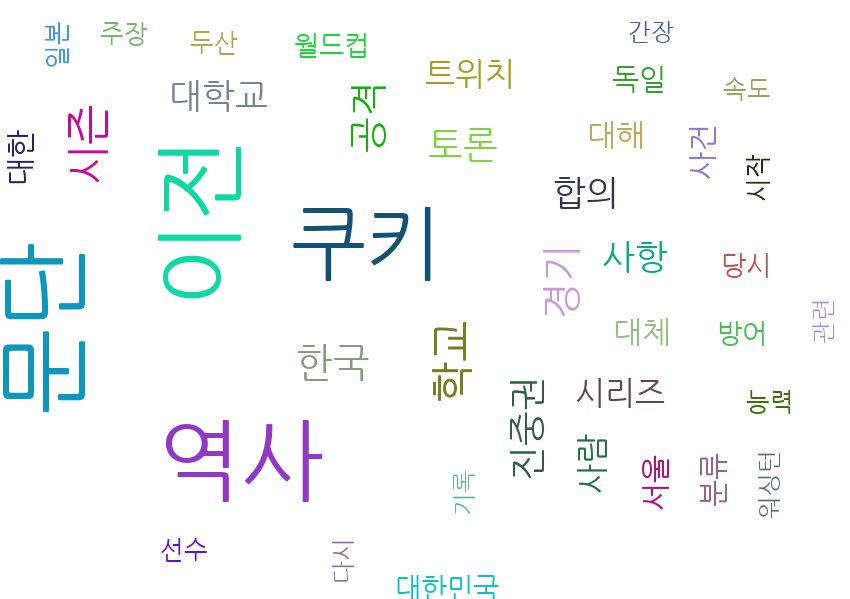

In [17]:
# 생성한 이미지를 주피터 노트북상에서 출력합니다.
from IPython.display import Image
Image(filename='../img/wordcloud.jpg')

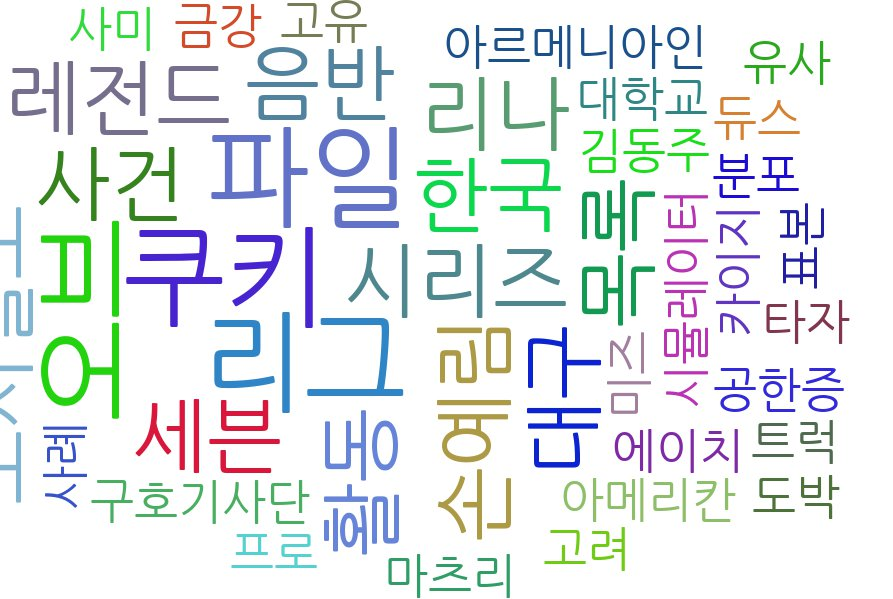

In [19]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, '../images/title_wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='../images/title_wordcloud.jpg')

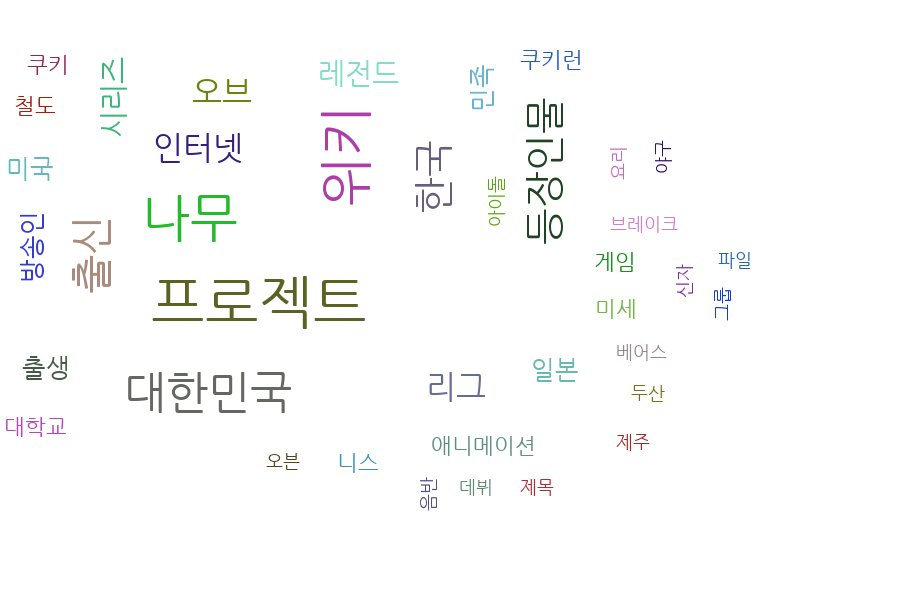

In [20]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(category_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, '../images/category_wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='../images/category_wordcloud.jpg')